# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [83]:
import pandas as pd
%matplotlib inline
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ee88410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10ef344d0>]], dtype=object)

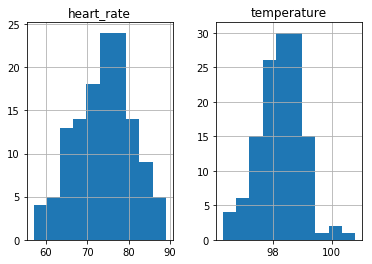

In [84]:
#Q: Is the distribution of body temperatures normal?
#A: The temperature distribution appears to be normal per the graph below
df.hist()

In [85]:
#Is the sample size large? Are the observations independent?
#A: The abstract doesn't mention how the data was collected so we don't know if it is independent. The sample size depends on the margin of error and significace level we want to achieve
#Sample size
len(df)

130

In [132]:
#Calculate sample mean and sample standard deviation of the temperature and the upper and lower limit of 2 standard deviations from the mean
mean = df["temperature"].mean()
std = df["temperature"].std()
upper = mean + 2*std
lower = mean - 2*std

In [87]:
#Calculate the percentage of datapoints within two standard deviations of the mean
#This suggests the data is normally distributed
within_2std = len(df[(df.temperature > lower)&(df.temperature < upper)]) 
float(within_2std)
float(within_2std)/(len(df))

0.9461538461538461

In [96]:
#Is the true population mean really 98.6 degrees F?
#H0: the population mean is 98.6
#H1: the population mean is not 98.6
#Given that the sample mean is 98.25, is this unlikely enough to disprove the null hypothesis?
#Estimate the population mean
est_pop_std = mean/np.sqrt(len(df))
est_pop_std

8.6170275736900788

In [102]:
#How many standard deviations away is the sample mean from assumed population mean
z = (mean - 98.6)/est_pop_std
z
#Because this z-value corresponds with a .484 p-value, which for a 2-tailed test is a 96.8% probability that we could see a mean of 98.25 when the population mean is 98.6, so we cannot reject the null
#I use a two-tailed test because I am testing that the temperature is not 98.6. I would use a one-tail if I want to test if the temperature is lower or higher than 98.6 based on my results
#I use z instead of t because the sample is sufficiently large and the sample has a normal distribution

-0.040706522959286118

In [104]:
#Run same calculation with the t test
degrees_of_freedom = len(df) - 1
degrees_of_freedom
#A t-value of -0.04 and 129 degrees of freedom is off the t-table because the results are so significant

129

In [111]:
#Q: At what temperature should we consider someone's temperature to be "abnormal"?
#Calculate a 95% CI. Find the z for a 95% CI
z = 1.96
MOE = z * (est_pop_std)
CI_upper = 98.6 + MOE
CI_lower = 98.6 - MOE
print('('+str(CI_lower)+','+str(CI_upper)+')')
#A: A temperature below 81.7 or above 115.5 would be considered abnormal at a 5% significance level

(81.7106259556,115.489374044)


In [129]:
#Q: Is there a significant difference between males and females in normal temperature?
#I will compute the standard error of the differences between the male and female temperature means
means = df.groupby("gender").mean() 
mean_f = means.loc["F","temperature"]
mean_m = means.loc["M","temperature"]
sample_diff = mean_m - mean_f

In [164]:
#H0: the population difference of male and female mean temperatures is 0
#H1: there is a difference in temperatures between male and females
#Calculate standard variances of the sample means 
variances = df.groupby("gender").var()
var_f = variances.loc["F","temperature"]
var_m = variances.loc["M","temperature"]
#Assume homogeneity of variance by taking the average of the male and female variances
mse = (var_f + var_m)/2
std_error = np.sqrt((2*mse)/len(df))
std_error

0.089487156527805867

In [165]:
z = sample_diff/std_error
z

-3.2320925197892043

In [166]:
#Probability of getting a value as extreme as -3.23 or +3.23 is 2*.0006 per the z table
p = 2*0.0006
p
#The probability of getting this extreme of a value is less than 1% so we can reject the null and say that there is a statistically significant difference between male and female temperatures
#Conclusion: Because males tend to have a lower temperature than females, it could be that early tests did not have an even spread to these two categories, which could have over or underestimated the body temperature of the populato

0.0012

In [162]:
counts = df.groupby("gender").size()
counts

gender
F    65
M    65
dtype: int64

In [169]:
#Standard deviation of the difference 
std_diff = np.sqrt(var_f/65 + var_m/65)

In [177]:
#Calculate 95% CI
lower = sample_diff - 1.96*std_diff
upper = sample_diff + 1.96*std_diff
print(lower, upper)
#Within the CI, the male temp is always lower than the female temp

(-0.53727651205358817, -0.041185026407865838)
